<a href="https://colab.research.google.com/github/vmkainga/Time-Series-Analysis-and-Forecasting/blob/main/Time_Series_Analysis_and_Forecasting_Violet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Build a model to predict the number of taxi orders for the next hour at airports

### b) Defining the Metric for Success

The metric we will use to evaluate our model is RMSE score.

### c) Understanding the Context 

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more
drivers during peak hours, we need to predict the number of taxi orders for the next hour. Build a
model for such a prediction.
The RMSE metric on the test set should not be more than 48.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis 
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [49]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [50]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/3p1QPAv)' , index_col=[0], parse_dates=[0])
df.sample(3)

,num_orders
datetime,
2018-08-14 23:50:00,53
2018-08-03 07:10:00,2
2018-07-02 21:10:00,26


In [51]:
#split data and confirm model has not triggered a time machine
from sklearn.model_selection import train_test_split

df.sort_index(inplace=True)
df = df.resample('1H').sum()

train, test = train_test_split(df, shuffle=False, test_size=0.2)

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-31 23:00:00


In [52]:
#preview hourly data
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [37]:
df.describe()

,num_orders,year,month,day,dayofweek,Hour,lag_1,rolling_mean
count,4416.000000,4416.0,4416.000000,4416.000000,4416.000000,4416.00000,4415.000000,4415.000000
mean,84.422781,2018.0,5.505435,15.836957,3.005435,11.50000,84.395470,84.395470
std,45.023853,0.0,1.713306,8.855229,1.990684,6.92297,44.992356,44.992356
min,0.000000,2018.0,3.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,54.000000,2018.0,4.000000,8.000000,1.000000,5.75000,54.000000,54.000000
50%,78.000000,2018.0,5.500000,16.000000,3.000000,11.50000,78.000000,78.000000
75%,107.000000,2018.0,7.000000,23.250000,5.000000,17.25000,107.000000,107.000000
max,462.000000,2018.0,8.000000,31.000000,6.000000,23.00000,462.000000,462.000000


# <font color='#2F4F4F'>3. Data Analysis</font>

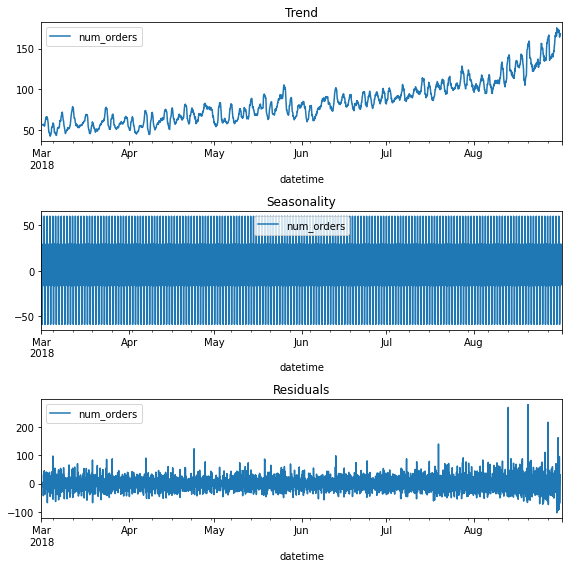

In [53]:
#plot trends and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df)

plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')



plt.tight_layout() 

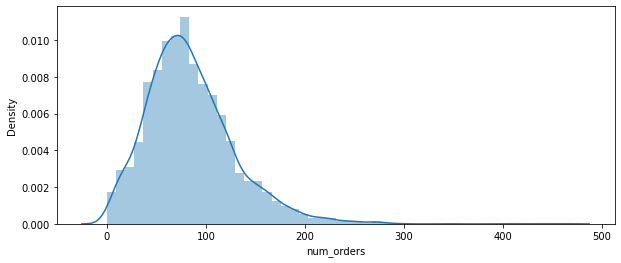

In [57]:
#getting distribution of orders

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10,4))
sns.distplot(df['num_orders'])
plt.show()

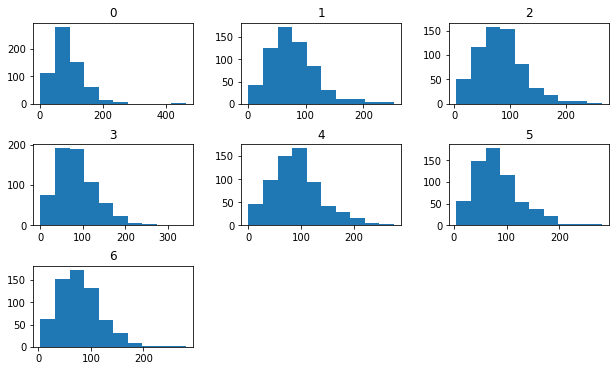

In [60]:
#plot orders by DayofWeek
df.hist('num_orders', by = 'dayofweek', rot = 0, figsize = (10, 6))
plt.show()

# <font color='#2F4F4F'>4. Creating Features and Modelling</font>

In [54]:
#create a function to make features
def define_features(df,max_lag,rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['Hour'] = df.index.hour

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
        df['num_orders'].shift().rolling(rolling_mean_size).mean()
    )


define_features(df, 1, 1)
print(df)

                     num_orders  year  month  day  dayofweek  Hour  lag_1  \
datetime                                                                    
2018-03-01 00:00:00         124  2018      3    1          3     0    NaN   
2018-03-01 01:00:00          85  2018      3    1          3     1  124.0   
2018-03-01 02:00:00          71  2018      3    1          3     2   85.0   
2018-03-01 03:00:00          66  2018      3    1          3     3   71.0   
2018-03-01 04:00:00          43  2018      3    1          3     4   66.0   
...                         ...   ...    ...  ...        ...   ...    ...   
2018-08-31 19:00:00         136  2018      8   31          4    19  207.0   
2018-08-31 20:00:00         154  2018      8   31          4    20  136.0   
2018-08-31 21:00:00         159  2018      8   31          4    21  154.0   
2018-08-31 22:00:00         223  2018      8   31          4    22  159.0   
2018-08-31 23:00:00         205  2018      8   31          4    23  223.0   

In [55]:
# split data and model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#split into test and train
train, test = train_test_split(df, shuffle=False, test_size=0.2)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
#fit model
model.fit(features_train, target_train)

#predict
y_pred = model.predict(features_test)

#evaluate model
print('RMSE:', np.sqrt(mean_squared_error(target_test, y_pred)))


RMSE: 47.639467087717875


# <font color='#2F4F4F'>5. Summary of Findings</font>




The linear Regression Model performed quite well with a RMSE value of less than 48.




# <font color='#2F4F4F'>6. Recommendations</font>

Model can be further improved by iterating on more feature selection

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
Yes, we had the right question

### b) Did we have the right data?
Yes, the data we had was relevant in answering the research question

### c) What can be done to improve the solution?
Get more data

Create more features/feature engineering

Perform hyperparameter tuning to improve model accuracy

